Importing necessary library and loading dataset

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
df=pd.read_csv(r"C:\Users\HP\Downloads\student_feedback.csv")
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


Exploratory Data Analysis (EDA)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

In [29]:
#Replacing column name
df.columns=df.columns.str.replace("Unnamed: 0","UnNamed",)
df.columns

Index(['UnNamed', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

Checking null values and duplicates

In [30]:
print("Number of null values present in Dataset :\n",df.isnull().sum())
print("\nNumber of Duplicates present in Dataset :",df.duplicated().sum())

Number of null values present in Dataset :
 UnNamed                                                 0
Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64

Number of Duplicates present in Dataset : 0


Finding Number of Unique Values in Dataset

In [31]:
print("Number of Unique Values in Dataset :\n","-"*50)
for i in df.columns[1:]:
    print("No of Unique Values in",i,"=",df[i].nunique())

Number of Unique Values in Dataset :
 --------------------------------------------------
No of Unique Values in Student ID = 1001
No of Unique Values in Well versed with the subject = 6
No of Unique Values in Explains concepts in an understandable way = 9
No of Unique Values in Use of presentations = 5
No of Unique Values in Degree of difficulty of assignments = 10
No of Unique Values in Solves doubts willingly = 10
No of Unique Values in Structuring of the course = 10
No of Unique Values in Provides support for students going above and beyond = 10
No of Unique Values in Course recommendation based on relevance = 10


since there are 0 null values and duplicates
We have also cleaned the dataset now lets build the visuals

Finding Sentiment Values and Visualizing it

In [32]:
rating_cols = df.columns[2:-2]
df["Sentiment Index"] = df[rating_cols].mean(axis=1)

# Categorizing sentiment into buckets
df["Sentiment Category"] = pd.cut(
    df["Sentiment Index"],
    bins=[0, 2, 4, df["Sentiment Index"].max()],
    labels=["Negative", "Neutral", "Positive"],
    include_lowest=True
)
print("\nSentiment category counts:\n", df["Sentiment Category"].value_counts())



Sentiment category counts:
 Sentiment Category
Positive    983
Neutral      18
Negative      0
Name: count, dtype: int64


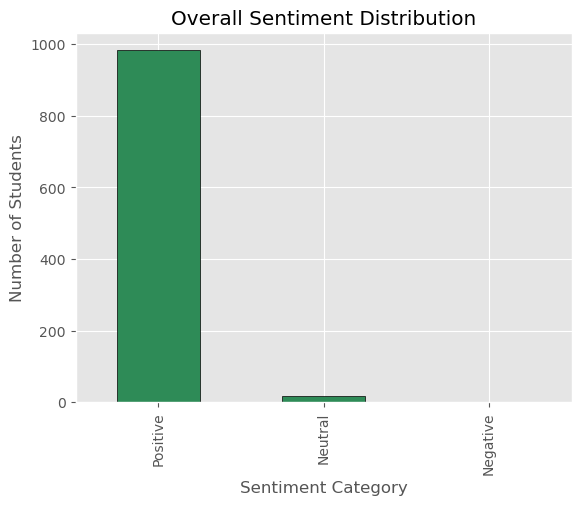

In [33]:
df["Sentiment Category"].value_counts().plot(kind="bar", color="seagreen", edgecolor="black")
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Students")
plt.show()

From above Visual We can see:

1. Majority of students fall into the "Positive" sentiment category.
2. A small group are in the "Neutral" category.
3. No students were categorized as "Negative".

This shows a strongly favorable overall sentiment toward the course and instructor.

Finding Average rating based on feedback Category

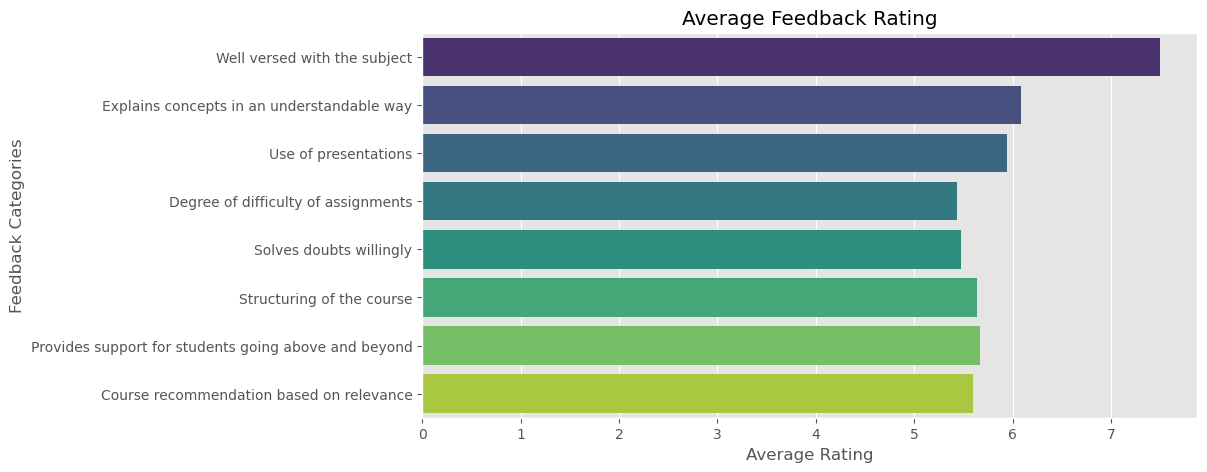

In [34]:
new_df=df.drop(columns=["Student ID","UnNamed","Sentiment Category","Sentiment Index"])
avg_rating=new_df.mean(numeric_only=True)
avg_rating.reset_index()
plt.figure(figsize=(10,5))
sns.barplot(y=avg_rating.index,x=avg_rating.values,hue=avg_rating.index,legend=False,palette="viridis")
plt.title("Average Feedback Rating")
plt.xlabel("Average Rating")
plt.ylabel("Feedback Categories")
plt.show()

Student Rating Distribution by Question

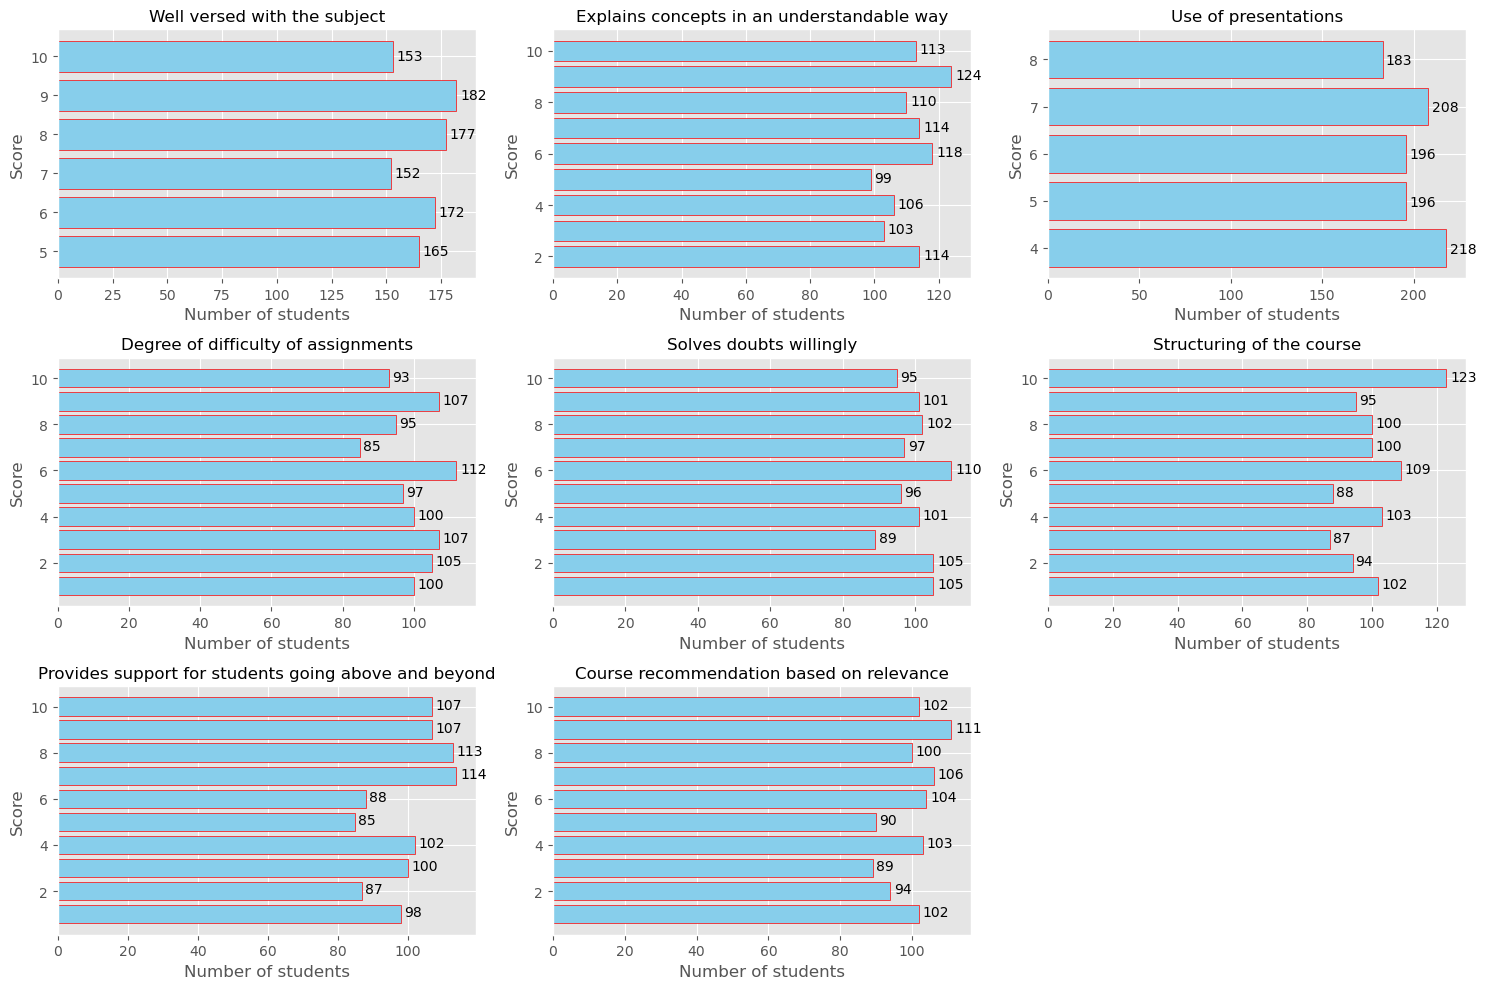

In [35]:
rating_cols = df.columns[2:-2]

# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Looping through each column and plot
for i, col in enumerate(rating_cols):
    col_counts = df[col].value_counts().sort_index()
    ax = axes[i]

    ax.barh(col_counts.index, col_counts, color="skyblue", edgecolor="red")
    ax.set_title(col, fontsize=12)
    ax.set_xlabel("Number of students")
    ax.set_ylabel("Score")

    # Annotate each bar
    for x, y in zip(col_counts.index, col_counts):
        ax.annotate(f"{y}", (y + y*0.01, float(x) - 0.1), fontsize=10)
axes[-1].axis("off")

plt.tight_layout()
plt.show()
